In [3]:
from main import *
import pickle
import time 

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
time = 8
gen = 100
pop = 50
mut = 1

print(8/3600)

print(time*gen*pop*mut/3600, 'hours')

0.0022222222222222222
11.11111111111111 hours


In [ ]:
start_overall = time.time()
populations = run_simulation(generations=5, population_size=5, mutations_per_division=2, test=robustness_test)
stop_overall = time.time()

with open('robustness_results.p', 'wb') as f:
    pickle.dump(populations, f)

print(stop_overall - start_overall, 'seconds to complete whole procedure')

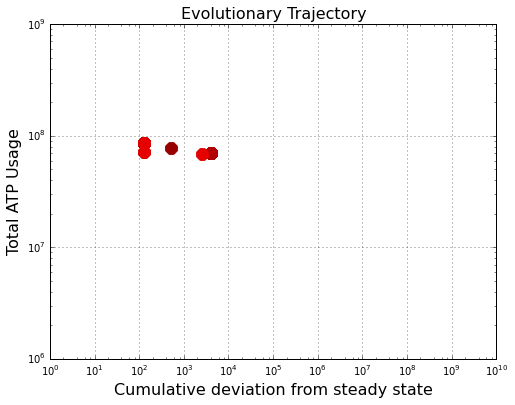

In [6]:
# plot 2D evolutionary trajectory

ax = plot_2D_trajectory(populations, obj=(0, 1))
ax.set_xlim(1e0, 1e5)
ax.set_ylim(1e6, 1e9)
ax.set_ylabel('Total ATP Usage')
ax.set_xlabel('Robustness Score')

Reaction Type           Reactants    Enzymes    Products
----------------------  -----------  ---------  ----------
catalytic_degradation   [0]          [1]        []
modification            [1]          []         [7]
catalytic_modification  [1]          [7]        [8]


Regulation Type      Target Gene    Transcription Factor
-----------------  -------------  ----------------------
activation                     0                       1
activation                     1                       2
repression                     1                       1
activation                     4                       3


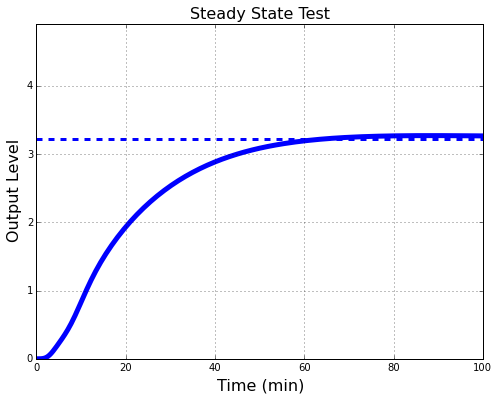

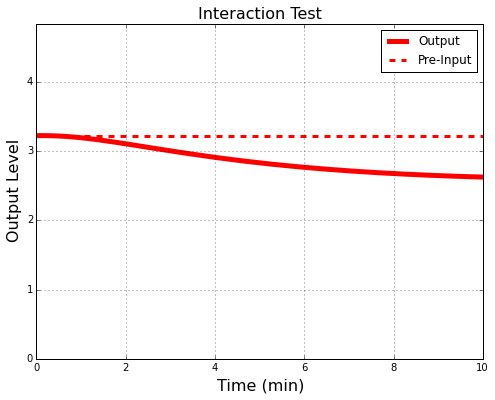

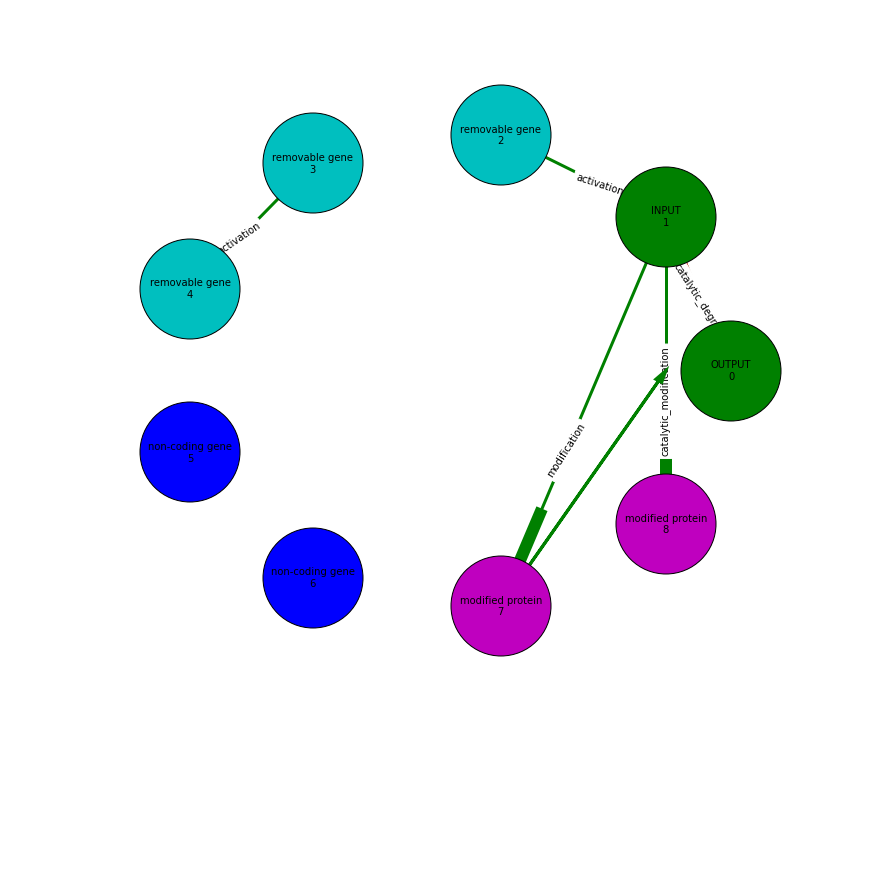

In [7]:
# select a cell from the population
cell_num = 1
cell = list(populations[len(populations)-1].items())[cell_num][0]

# check it's steady state simulation results
steady_states = cell.get_steady_states(input_node=2, input_magnitude=1)
cell.plot_steady_states(input_node=2, input_magnitude=1, output_node=1)
ax = plt.gca()
ax.plot([0, 100], [steady_states[cell.key[1]], steady_states[cell.key[1]]], '--b', linewidth=3, label='Steady State')

# check its interaction test results
_ = cell.interaction_check_numerical(input_node=2, output_node=1, steady_states=steady_states, plot=True)
ax = plt.gca()
ax.plot([0, 100], [steady_states[cell.key[1]], steady_states[cell.key[1]]], '--r', linewidth=3, label='Pre-Input')
ax.legend(loc=0)

# generate table of all reactions and modifications
cell.show_reactions(grn_indices=True)

# generate network graph
cell.show_topology(input_node=2, output_node=1)

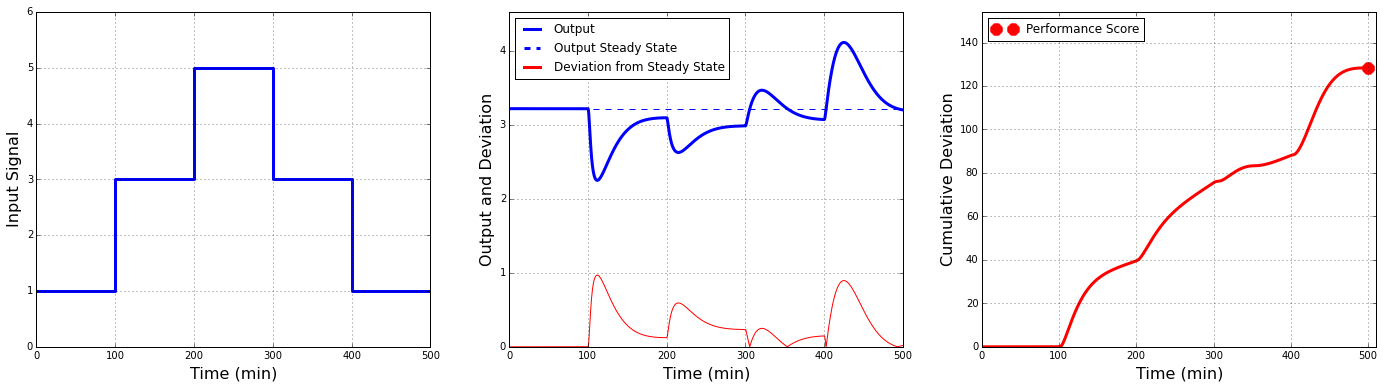

In [8]:
# run adaptation test
score, energy = adaptation_test(cell, input_node=2, output_node=1, input_random=False, plot=True)

# run robustness test
scores = robustness_test(cell, num_mutants=10, input_node=2, output_node=1, steady_states=None, plot=True)

In [16]:
# import pickle

# with open('populations.p', 'wb') as f:
#     pickle.dump(populations, f)